In [1]:
# Importage
import warnings
warnings.filterwarnings('ignore')

# os stuff
import os
import sys

import nibabel as nib
from nilearn.plotting import plot_surf, plot_surf_stat_map, plot_roi, plot_anat, plot_surf_roi
from nilearn.image import index_img

import seaborn as sns

# whobpyt stuff
import whobpyt
from whobpyt.data.dataload import dataloader
# from whobpyt.models.jansen_rit import RNNJANSEN
from whobpyt.models.wong_wang import RNNRWW
from whobpyt.datatypes.modelparameters import ParamsModel
from whobpyt.optimization.modelfitting import Model_fitting

# array and pd stuff
import numpy as np
import pandas as pd

# viz stuff
import matplotlib.pyplot as plt

In [2]:
from collections import Counter

In [3]:
import seaborn as sns
import scipy.stats as stats

In [4]:
import pickle

In [5]:
data_path = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/Data/Shrey/WhoBPyT/200_subjects_WhoBPyT_task_run_pkls'

In [6]:
pconn_path = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/Data/Shrey/Shrey_SS_parcellated_Func_Conns_IV/'


In [9]:
import re

In [10]:
folder_one_path = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/Data/Shrey/Shrey_SS_parcellated_Func_Conns_II'
folder_two_path = SCs_path = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/Data/Shrey/Improved_WWD_HCP_model_runs/All_Subs_SC_Wts/Davide_HCP_Data_Matrix'

# Get the list of files in each folder
folder_one_files = os.listdir(folder_one_path)
folder_two_files = os.listdir(folder_two_path)

# Extract the numbers from the filenames in folder_one
folder_one_numbers = []
for file in folder_one_files:
    match = re.search(r'\d+', file)
    if match:
        folder_one_numbers.append(int(match.group()))

# Extract the numbers from the filenames in folder_two
folder_two_numbers = []
for file in folder_two_files:
    match = re.search(r'\d+', file)
    if match:
        folder_two_numbers.append(int(match.group()))

# Find the common numbers between the two folders
common_numbers = list(set(folder_one_numbers) & set(folder_two_numbers))

sub_list = common_numbers.copy()

sub_list.sort()

sub_list = sub_list[0:200]

In [11]:
sub_list.index(140420) # the task fMRI dtseries for this subject is absent in the HCP S-900 folder in public datasets. 

133

In [12]:
# del sub_list[133]

In [17]:
def emp_fc(sub_id):
    pconn1LR = pconn_path + '{0}_tfMRI_SOCIAL_RL_200Schaefer_7Ntwx_cifti_parcellated.ptseries.nii'.format(sub_id)
    if os.path.isfile(pconn1LR) == True:
        pconn_img1LR = nib.load(pconn1LR)
        pconn_dat1LR = pconn_img1LR.get_data()
        pconn_dat1LR = pconn_dat1LR/1
        return pconn_dat1LR

In [18]:
%%time

all_subs_emp_fc = []
for i in range(len(sub_list)):
    ss_emp_fc = emp_fc(sub_list[i])
    all_subs_emp_fc.append(ss_emp_fc)

CPU times: user 1min 1s, sys: 442 ms, total: 1min 2s
Wall time: 1min 19s


In [34]:
for i in range(200):
    if all_subs_emp_fc[i] is None:
        print(i, sub_list[i])

44 112819
106 132118


In [48]:
all_subs_emp_fc[0].shape

(274, 200)

In [50]:
np.corrcoef(all_subs_emp_fc[0].T).shape

(200, 200)

In [35]:
%%time
all_subs_emp_fc_mat = []
for i in range(200):
    if all_subs_emp_fc[i] is None:
        continue
            
    all_subs_emp_fc_mat.append(np.corrcoef(all_subs_emp_fc[i].T))

CPU times: user 473 ms, sys: 35.7 ms, total: 508 ms
Wall time: 505 ms


In [38]:
pconn_path = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/Data/Shrey/Shrey_SS_parcellated_Func_Conns_II/'

In [39]:
def rest_emp_fc(sub_id):
    pconn1LR = pconn_path + '{0}_rfMRI_REST1_RL_Schaefer200_cifti_parcellated.ptseries.nii'.format(sub_id)
    pconn_img1LR = nib.load(pconn1LR)
    pconn_dat1LR = pconn_img1LR.get_data()
    pconn_dat1LR = pconn_dat1LR/1
    return pconn_dat1LR

In [40]:
%%time

all_subs_rest_emp_fc = []
for i in range(len(sub_list)):
    ss_rest_emp_fc = rest_emp_fc(sub_list[i])
    all_subs_rest_emp_fc.append(ss_rest_emp_fc)

CPU times: user 1min 1s, sys: 480 ms, total: 1min 2s
Wall time: 1min 4s


In [41]:
%%time
all_subs_rest_emp_fc_mat = []
for i in range(199):
    all_subs_rest_emp_fc_mat.append(np.corrcoef(all_subs_rest_emp_fc[i].T))

CPU times: user 1.38 s, sys: 75.8 ms, total: 1.45 s
Wall time: 1.45 s


In [42]:
len(all_subs_emp_fc_mat)

198

In [43]:
node_size = 200
mask = np.tril_indices(node_size, -1)

In [46]:
b = np.random.randint(1,199,10)
b

array([ 25, 180,  82,  55,  38,  15,  84, 107, 100, 154])

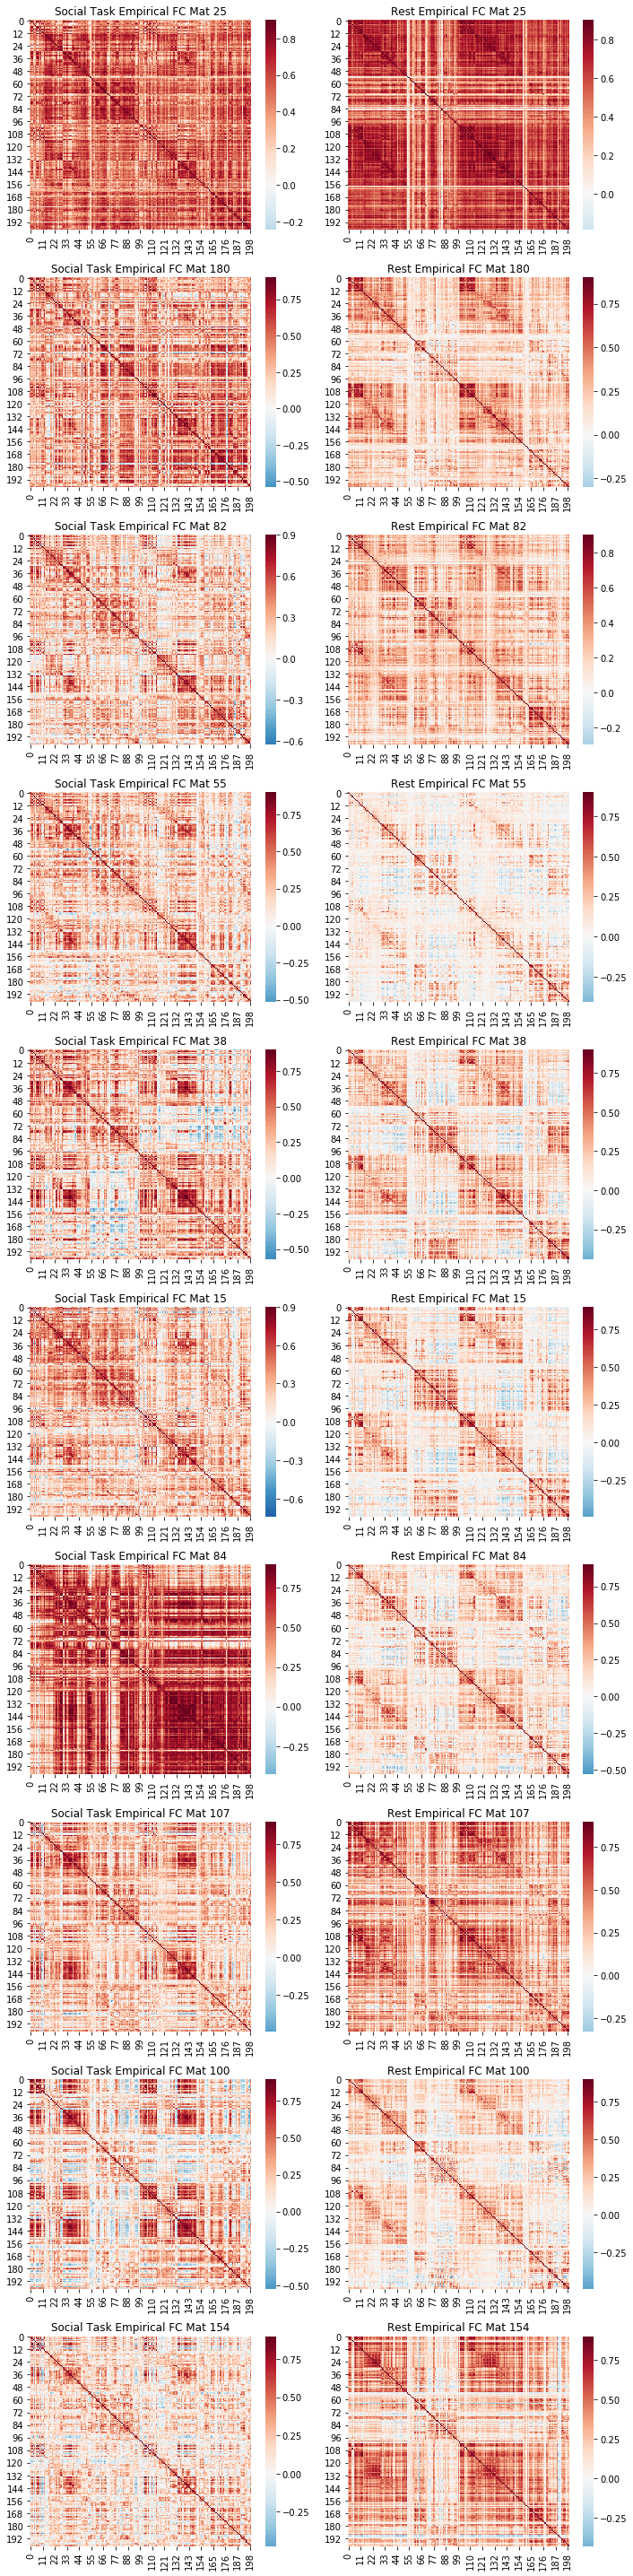

In [47]:
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(10, 40))

for i in range(10):
    sns.heatmap(all_subs_emp_fc_mat[b[i]], center=0, cmap='RdBu_r', vmax=0.9, ax=axes[i, 0])
    axes[i, 0].set_title(f'Social Task Empirical FC Mat {b[i]}')

# Plotting Rest Empirical FC Matrices
for i in range(10):
    sns.heatmap(all_subs_rest_emp_fc_mat[b[i]], center=0, cmap='RdBu_r', vmax=0.9, ax=axes[i, 1])
    axes[i, 1].set_title(f'Rest Empirical FC Mat {b[i]}')

plt.tight_layout()
plt.show()

In [73]:
%%time

all_subs_whobpyt_motor_task_fMRI = []

for i in range(199):
    
    sub_id = sub_list[i]
    filename = data_path + '/Subj_{0}_fittingresults_task_stim_exp.pkl'.format(sub_id)
    with open(filename, 'rb') as f:
        ss_og_data = pickle.load(f)
    
    _test_task_fMRI_mat = np.corrcoef(ss_og_data.output_sim.bold_test)
    
    all_subs_whobpyt_motor_task_fMRI.append(_test_task_fMRI_mat)
    
    del ss_og_data


CPU times: user 7.98 s, sys: 20.7 s, total: 28.7 s
Wall time: 29.5 s


In [75]:
corrs_list = []
for i in range(199):
    corrs_list.append(np.corrcoef(all_subs_emp_fc_mat[i][mask], all_subs_whobpyt_motor_task_fMRI[i][mask])[0][1])

In [76]:
print(np.mean(corrs_list))
print(np.std(corrs_list))

0.2859536482772724
0.07396119310575491


In [78]:
# resting-state but in 300 sec chunks

In [138]:
data_path = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/Data/Shrey/WhoBPyT/200_subjects_WhoBPyT_run_pkls'
pconn_path = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/Data/Shrey/Shrey_SS_parcellated_Func_Conns_II/'

In [ ]:
# /external/rprshnas01/netdata_kcni/jglab/MemberSpaces/Data/Shrey/WhoBPyT/200_subjects_WhoBPyT_run_pkls

In [150]:
%%time

all_subs_whobpyt_resting_state_fMRI = []

for i in range(10):
    print(i)
    sub_id = sub_list[i]
    
    filename = data_path + '/Subj_{0}_fittingresults_stim_exp.pkl'.format(sub_id)
    with open(filename, 'rb') as f:
        ss_og_data = pickle.load(f)
    
    rs_fMRI_mat = np.corrcoef(ss_og_data.output_sim.bold_test)
    
    all_subs_whobpyt_resting_state_fMRI.append(rs_fMRI_mat)
    
    del ss_og_data


0
1
2
3
4
5
6
7
8
9
CPU times: user 1.34 s, sys: 5.13 s, total: 6.46 s
Wall time: 6.5 s


In [159]:
corrs_list = []
for i in range(10):
    corrs_list.append(np.corrcoef(all_subs_rest_emp_fc_mat[i][mask], all_subs_whobpyt_resting_state_fMRI[i][mask])[0][1])

print(np.mean(corrs_list))
print(np.std(corrs_list))

0.6136101066693447
0.046874073108931186


In [99]:
filename = data_path + '/Subj_{0}_fittingresults_stim_exp.pkl'.format(sub_id)
with open(filename, 'rb') as f:
    ss_og_data = pickle.load(f)

In [134]:
# test_rs_chunk = ss_og_data.output_sim.bold_test[:,300:600]
# test_rs_chunk = ss_og_data.output_sim.bold_test[:,600:900]
test_rs_chunk = ss_og_data.output_sim.bold_test[:,0:1200]

In [135]:
rs_chunk_mat = np.corrcoef(test_rs_chunk)

In [136]:
rs_chunk_mat.shape

(200, 200)

In [137]:
(np.corrcoef(all_subs_emp_fc_mat[i][mask], rs_chunk_mat[mask])[0][1])

0.28387686259766426

In [142]:
%%time

all_subs_whobpyt_resting_state_fMRI_chunks_1 = []

for i in range(199):
    
    sub_id = sub_list[i]
    filename = data_path + '/Subj_{0}_fittingresults_stim_exp.pkl'.format(sub_id)
    with open(filename, 'rb') as f:
        ss_og_data = pickle.load(f)
    
    test_rs_chunk = ss_og_data.output_sim.bold_test[:,300:600]
    rs_chunk_mat = np.corrcoef(test_rs_chunk)
    
    all_subs_whobpyt_resting_state_fMRI_chunks_1.append(rs_chunk_mat)
    
    del ss_og_data


CPU times: user 34.6 s, sys: 2min 28s, total: 3min 2s
Wall time: 10min 36s


In [143]:
%%time

all_subs_whobpyt_resting_state_fMRI_chunks_2 = []

for i in range(199):
    
    sub_id = sub_list[i]
    filename = data_path + '/Subj_{0}_fittingresults_stim_exp.pkl'.format(sub_id)
    with open(filename, 'rb') as f:
        ss_og_data = pickle.load(f)
    
    test_rs_chunk = ss_og_data.output_sim.bold_test[:,600:900]
    rs_chunk_mat = np.corrcoef(test_rs_chunk)
    
    all_subs_whobpyt_resting_state_fMRI_chunks_2.append(rs_chunk_mat)
    
    del ss_og_data


CPU times: user 25.7 s, sys: 1min 39s, total: 2min 5s
Wall time: 2min 7s


In [144]:
# %%time

# all_subs_whobpyt_resting_state_fMRI_chunks_3 = []

# for i in range(199):
    
#     sub_id = sub_list[i]
#     filename = data_path + '/Subj_{0}_fittingresults_stim_exp.pkl'.format(sub_id)
#     with open(filename, 'rb') as f:
#         ss_og_data = pickle.load(f)
    
#     test_rs_chunk = ss_og_data.output_sim.bold_test[:,900:1200]
#     rs_chunk_mat = np.corrcoef(test_rs_chunk)
    
#     all_subs_whobpyt_resting_state_fMRI_chunks_3.append(rs_chunk_mat)
    
#     del ss_og_data


In [160]:
corrs_list = []
for i in range(199):
    corrs_list.append(np.corrcoef(all_subs_rest_emp_fc_mat[i][mask], all_subs_whobpyt_resting_state_fMRI_chunks_2[i][mask])[0][1])

print(np.mean(corrs_list))
print(np.std(corrs_list))

0.526786944126622
0.05645665689778389


In [161]:
corrs_list = []
for i in range(199):
    corrs_list.append(np.corrcoef(all_subs_rest_emp_fc_mat[i][mask], all_subs_whobpyt_resting_state_fMRI_chunks_1[i][mask])[0][1])

In [162]:
print(np.mean(corrs_list))
print(np.std(corrs_list))

0.5252074693377072
0.053279581651873256
